# 7장 케라스 완전 정복

### 7.1 다양한 워크플로

### 7.2 케라스 모델을 만드는 여러 방법

#### 7.2.1 Sequential 모델

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.weights

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [5]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.07504815,  0.14975998, -0.02269268,  0.0520032 , -0.02330056,
         -0.25303024, -0.1126857 ,  0.18386596, -0.21484289,  0.03728989,
         -0.2909464 , -0.17968422, -0.294511  , -0.06971629, -0.05113235,
          0.23126793, -0.20298457,  0.255507  , -0.14215869, -0.12186497,
          0.2764302 ,  0.25880504, -0.20325713,  0.09516627, -0.28292423,
          0.01128903,  0.10603634,  0.1918678 ,  0.29291838, -0.20295846,
          0.10565448,  0.03410542, -0.07862316,  0.02070153,  0.11045551,
         -0.16921513,  0.00529176, -0.22835472,  0.2176711 , -0.10642411,
         -0.09008819, -0.2131812 , -0.24404395,  0.21569586,  0.18913734,
          0.17748031,  0.15104115, -0.06096731, -0.04589593,  0.21303988,
          0.28871143, -0.13304149,  0.13490635,  0.18005073,  0.10909292,
          0.20847529,  0.16823754,  0.20813167, -0.17730556,  0.17456004,
         -0.09180373, -0.08232801,  0.18379

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# name 매개변수로 모델과 층에 이름 지정하기
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델의 입력 크기를 미리 지정하기
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### 7.2.2 함수형 API

##### 간단한 예제

In [11]:
# 2개의 Dense 층을 가진 간단한 함수형 모델
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
inputs.shape

TensorShape([None, 3])

In [13]:
inputs.dtype

tf.float32

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


##### 다중 입력, 다중 출력 모델

In [16]:
# 다중 입력, 다중 출력 함수형 모델
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

##### 다중 입력, 다중 출력 모델 훈련하기

In [17]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(
    optimizer='rmsprop',
    loss=['mean_squared_error', 'categorical_crossentropy'],
    metrics=[['mean_absolute_error'], ['accuracy']]
)
model.fit(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data],
    epochs=1
)
model.evaluate(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data]
)
priority_preds, departments_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

40/40 [==============================] - 0s 3ms/step


In [18]:
# 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기
model.compile(
    optimizer='rmsprop',
    loss={'priority': 'mean_squared_error',
          'department': 'categorical_crossentropy'},
    metrics={'priority': ['mean_absolute_error'],
             'department': ['accuracy']}
)
model.fit(
    {'title': title_data,
     'text_body': text_body_data,
     'tags': tags_data},
    {'priority': priority_data,
     'department': department_data},
    epochs=1
)
model.evaluate(
    {'title': title_data,
     'text_body': text_body_data,
     'tags': tags_data},
    {'priority': priority_data,
     'department': department_data}
)
priority_preds, departments_preds = model.predict(
    {'title': title_data,
     'text_body': text_body_data,
     'tags': tags_data}
)

40/40 [==============================] - 0s 3ms/step


##### 함수형 API의 장점: 층 연결 구조 재활용하기

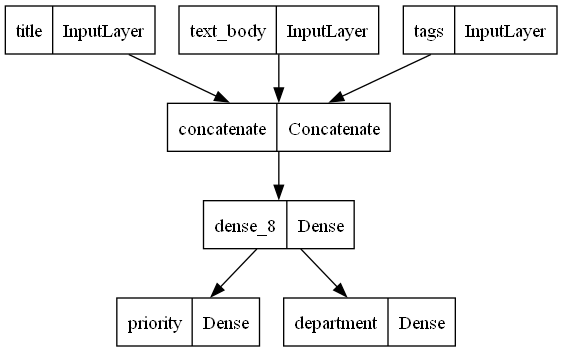

In [19]:
keras.utils.plot_model(model, 'ticket_classifier.png')

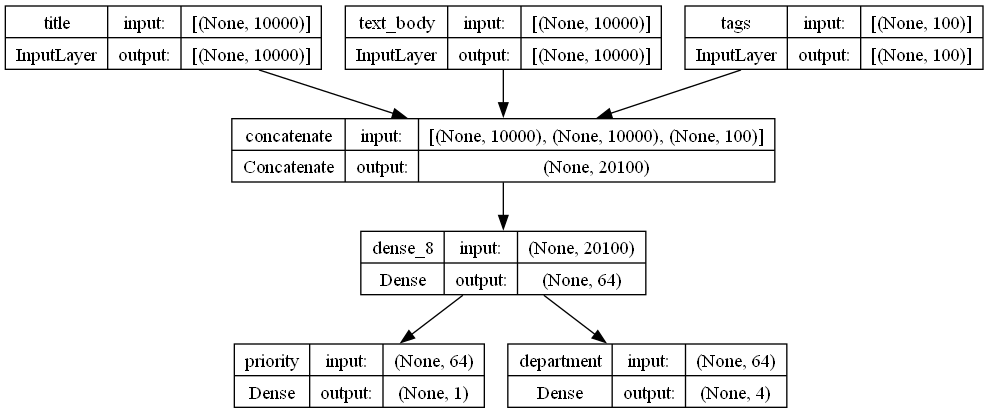

In [20]:
keras.utils.plot_model(
    model, 'ticket_classifier_with_shape_info.png', show_shapes=True
)

In [21]:
# 함수형 모델에 있는 층의 입력과 출력을 출력하기
model.layers

In [22]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [23]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [24]:
# 중간층의 출력을 재사용해서 새로운 모델 만들기
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

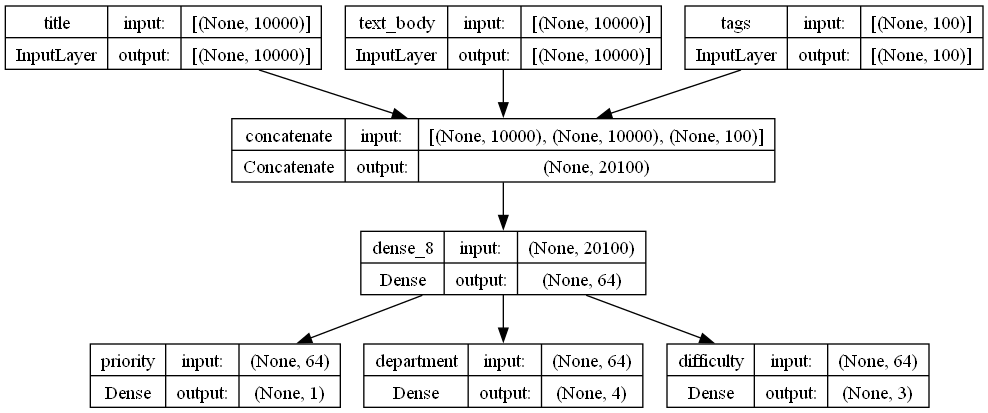

In [25]:
keras.utils.plot_model(
    new_model, 'updated_ticket_classifier.png', show_shapes=True
)

#### 7.2.3 Model 서브클래싱

##### 이전 예제를 서브클래싱 모델로 다시 만들기

In [34]:
# 간단한 서브클래싱 모델
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [35]:
model = CustomerTicketModel(num_departments=4)
priority, department = model(
    {'title': title_data, 'text_body': text_body_data, 'tags': tags_data}
)

In [37]:
model.compile(
    optimizer='rmsprop',
    loss=['mean_squared_error', 'categorical_crossentropy'],
    metrics=[['mean_absolute_error'], ['accuracy']]
)
model.fit(
    {'title': title_data,
     'text_body': text_body_data,
     'tags': tags_data},
    [priority_data, department_data],
    epochs=1
)
model.evaluate(
    {'title': title_data,
    'text_body': text_body_data,
    'tags': tags_data},
    [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    {'title': title_data,
     'text_body': text_body_data,
     'tags': tags_data}
)

40/40 [==============================] - 0s 3ms/step


##### 주의: 서브클래싱된 모델이 지원하지 않는 것

#### 7.2.4 여러 방식을 혼합하여 사용하기

In [41]:
# 서브클래싱한 모델을 포함하는 함수형 모델 만들기
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = 'sigmoid'
        else:
            num_units = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(num_units, activation=activation)
    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [44]:
# 함수형 모델을 포함하는 서브클래싱 모델 만들기
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation='relu')
        self.classifier = binary_classifier
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

#### 7.2.5 작업에 적합한 도구 사용하기

In [46]:
# 표준 워크플로: compile(), fit(), evaluate(), predict()
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float') / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2937 - accuracy: 0.9142 - val_loss: 0.1451 - val_accuracy: 0.9599
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1644 - accuracy: 0.9538 - val_loss: 0.1319 - val_accuracy: 0.9640
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


#### 7.3.1 사용자 정의 평가 지표 만들기

In [53]:
# Metric 클래스를 상속하여 사용자 정의 지표 구하기
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros',
                                             dtype='int32')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [54]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2930 - accuracy: 0.9124 - rmse: 7.1814 - val_loss: 0.1495 - val_accuracy: 0.9566 - val_rmse: 7.3557
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1680 - accuracy: 0.9530 - rmse: 7.3549 - val_loss: 0.1341 - val_accuracy: 0.9639 - val_rmse: 7.3995
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.1030 - accuracy: 0.9724 - rmse: 7.4315


#### 7.3.2 콜백 사용하기

##### ModelCheckpoint와 EarlyStopping 콜백

In [57]:
# fit() 메서드에서 callbacks 매개변수 사용하기
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',
        monitor='val_loss',
        save_best_only=True
    )
]
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2897 - accuracy: 0.9145 - val_loss: 0.1398 - val_accuracy: 0.9609
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1650 - accuracy: 0.9538 - val_loss: 0.1210 - val_accuracy: 0.9674
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1404 - accuracy: 0.9615 - val_loss: 0.1101 - val_accuracy: 0.9728
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1235 - accuracy: 0.9679 - val_loss: 0.1128 - val_accuracy: 0.9742
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1154 - accuracy: 0.9706 - val_loss: 0.1108 - val_accuracy: 0.9750
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1115 - accuracy: 0.9726 - val_loss: 0.1088 - val_accuracy: 0.9789
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1028 - accuracy: 0.9754 - val_loss: 0.1106 - val_accuracy:

In [58]:
model = keras.models.load_model('checkpoint_path.keras')

#### 7.3.3 사용자 정의 콜백 만들기

In [59]:
# Callback 클래스를 상속하여 사용자 정의 콜백 만들기
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label='Training loss for each batch')
        plt.xlabel(f'Batch (epoch {epoch})')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f'plot_at_epoch_{epoch}')
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2937 - accuracy: 0.9129 - val_loss: 0.1572 - val_accuracy: 0.9554
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1651 - accuracy: 0.9539 - val_loss: 0.1226 - val_accuracy: 0.9656
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1385 - accuracy: 0.9634 - val_loss: 0.1105 - val_accuracy: 0.9702
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1261 - accuracy: 0.9679 - val_loss: 0.1208 - val_accuracy: 0.9722
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1198 - accuracy: 0.9705 - val_loss: 0.1078 - val_accuracy: 0.9754
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1119 - accuracy: 0.9726 - val_loss: 0.1066 - val_accuracy: 0.9774
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1042 - accuracy: 0.9754 - val_loss: 0.1257 - val_accuracy:

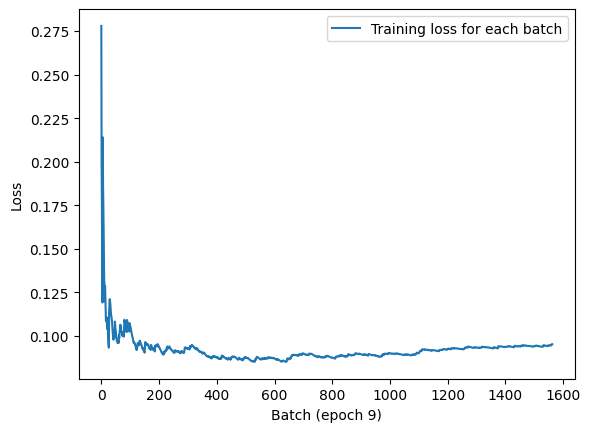

In [60]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

#### 7.3.4 텐서보드를 사용한 모니터링과 시각화

In [64]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = keras.callbacks.TensorBoard(
    log_dir='/full_path_to_your_log_dir'
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2950 - accuracy: 0.9120 - val_loss: 0.1575 - val_accuracy: 0.9543
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1679 - accuracy: 0.9541 - val_loss: 0.1286 - val_accuracy: 0.9646
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1432 - accuracy: 0.9611 - val_loss: 0.1037 - val_accuracy: 0.9740
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1255 - accuracy: 0.9674 - val_loss: 0.1136 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1161 - accuracy: 0.9705 - val_loss: 0.1036 - val_accuracy: 0.9749
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1121 - accuracy: 0.9727 - val_loss: 0.1028 - val_accuracy: 0.9766
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1045 - accuracy: 0.9753 - val_loss: 0.1085 - val_accuracy:

In [65]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11400), started 0:03:45 ago. (Use '!kill 11400' to kill it.)

### 7.4 사용자 정의 훈련, 평가 루프 만들기

#### 7.4.1 훈련 vs 추론

In [71]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))